In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Load the dataset
data = pd.read_csv("/content/supervisedDataset.csv")

In [ ]:
# Set plot style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

NameError: name 'sns' is not defined

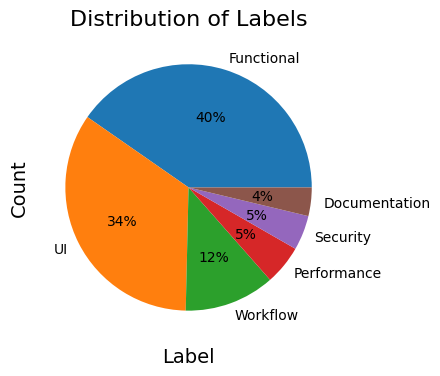

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
data['label'].value_counts().plot(kind='pie',autopct='%1.0f%%' )
plt.title("Distribution of Labels", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

<ipython-input-32-abb47196391f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='label', order=data['label'].value_counts().index, palette=palette)
<ipython-input-32-abb47196391f>:3: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.countplot(data=data, y='label', order=data['label'].value_counts().index, palette=palette)


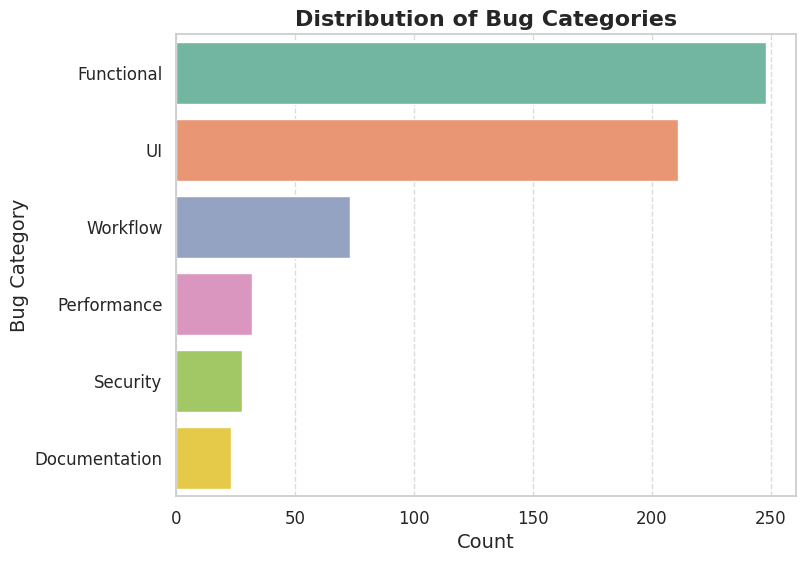

In [ ]:
# Plot the distribution of bug categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='label', order=data['label'].value_counts().index, palette=palette)
plt.title('Distribution of Bug Categories', fontsize=16, weight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Bug Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

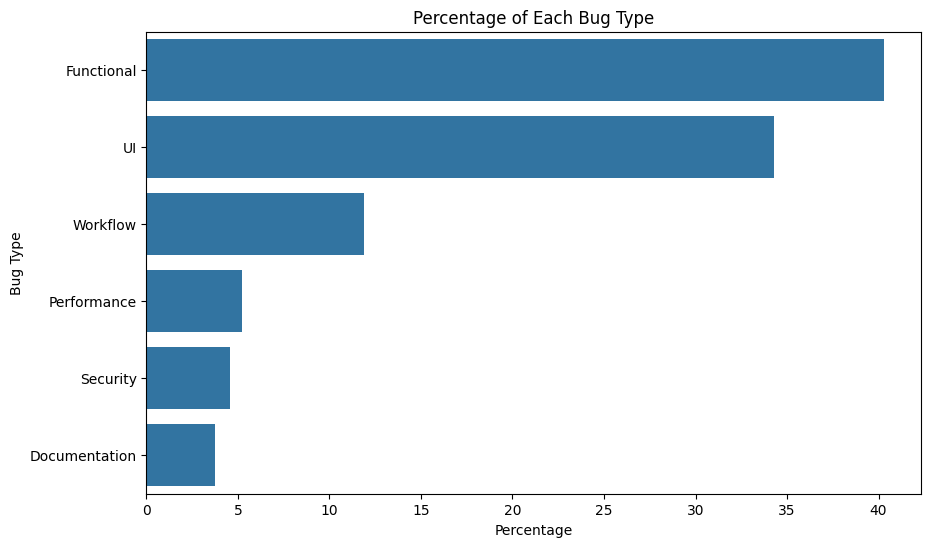

In [ ]:
# Plot the percentage of each bug type
bug_type_percentage = data['label'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=bug_type_percentage.values, y=bug_type_percentage.index)
plt.title('Percentage of Each Bug Type')
plt.xlabel('Percentage')
plt.ylabel('Bug Type')
plt.show()

<ipython-input-36-abb13e0987ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bug_type_percentage.values, y=bug_type_percentage.index, palette=palette)
<ipython-input-36-abb13e0987ed>:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x=bug_type_percentage.values, y=bug_type_percentage.index, palette=palette)


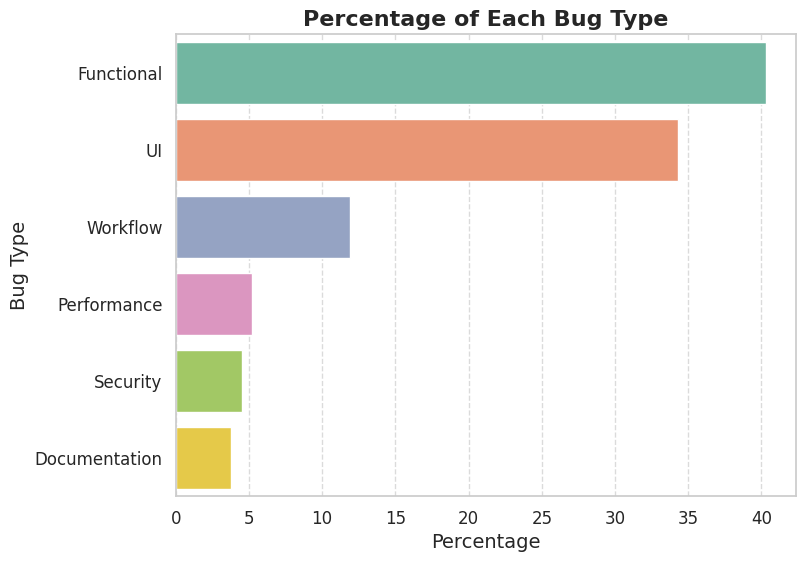

In [ ]:
# Plot the percentage of each bug type
bug_type_percentage = data['label'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=bug_type_percentage.values, y=bug_type_percentage.index, palette=palette)
plt.title('Percentage of Each Bug Type', fontsize=16, weight='bold')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Bug Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["descriptions"], data["label"], test_size=0.2, random_state=42)

In [ ]:
# Create a CountVectorizer object to convert text into numerical features
vectorizer = CountVectorizer()

In [ ]:
# Fit the vectorizer on the training data
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
# Transform the training and testing data into numerical features
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Create a Multinomial Naive Bayes model
model = MultinomialNB()

In [ ]:
# Train the model on the training data
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Evaluate the model on the testing data
accuracy = model.score(X_test_vectorized, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6341463414634146


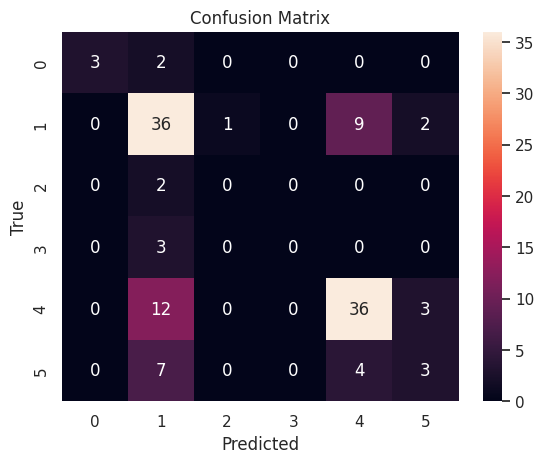

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_vectorized)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

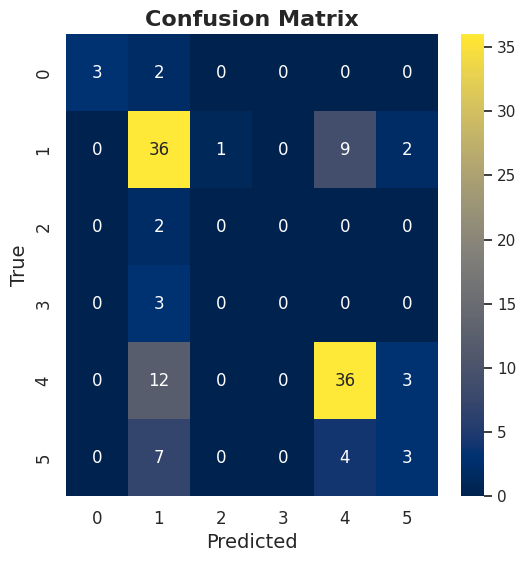

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming model is already defined and trained
# Assuming X_test_vectorized and y_test are already defined

y_pred = model.predict(X_test_vectorized)
cm = confusion_matrix(y_test, y_pred)

# Use a color palette suitable for printing
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


AttributeError: 'Axes3D' object has no attribute 'set_thetazlabel'

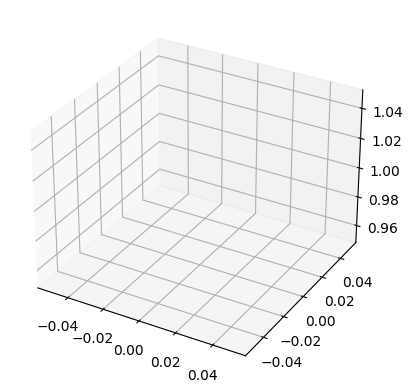

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'data' is a list of values
data2 =data['label'].value_counts()

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the angles for the pie chart
angles = np.linspace(0, 2*np.pi, len(data2), endpoint=False)

# Create the pie chart
ax.plot_surface(np.zeros((len(data2), 1)), np.zeros((len(data2), 1)), np.ones((len(data2), 1)),
                rstride=1, cstride=1, facecolors=plt.cm.rainbow(np.linspace(0, 1, len(data2))),
                 alpha=0.7)

# Add the pie chart to the Axes
ax.set_thetazlabel('label')
ax.set_rlabel_position(0)
ax.set_rlabeltext([''] * len(data2))
ax.set_rlabeltext([''] * len(data2), labelpad=20)

# Set the title
ax.set_title('Category Distribution')

# Show the plot
plt.show()

In [ ]:
# Define a function to predict the label for a new description
def predict_label(description):
    # Transform the new description into numerical features
    description_vectorized = vectorizer.transform([description])

    # Predict the label
    label = model.predict(description_vectorized)

    # Return the predicted label
    return label

In [ ]:

# def predict_label(description):
#     description_vectorized = vectorizer.transform([description])
#     label = model.predict(description_vectorized)
#     return label

In [ ]:
# Input a new description
#new_description = "The buttons present in the table section is not keyboard operable.Actual result is that The 'Assignee', 'Target start', 'Target end', and 'Status' buttons in table section is not operable with a keyboard. The role and state of the button is not programmatically determined for screen reader users. This made it difficult for keyboard-only and screen reader users to access the functionality associated with mentioned button"

new_description ="create issue dialog: ARIA role='toolbar' attribute provided unnecessarily.In create issue modal dialog, the <div> element containing 'configure fields' button have role='toolbar' attribute provided unnecessarily"
# Predict the label for the new description
predicted_label = predict_label(new_description)

# Print the predicted label
print("Predicted label:", predicted_label)

Predicted label: ['Workflow']


In [ ]:
new_description ="create issue dialog: ARIA role='toolbar' attribute provided unnecessarily.In create ... issuemodal dialog, the <div> element containing 'configure fields' button have role='toolbar' attribute provided unnecessarily"

predicted_label = predict_label(new_description)

# Print the predicted label
print("Predicted label:", predicted_label)

Predicted label: ['Workflow']
